## Ridge Regression (Tikhonov regulations)

- It is regularized version of Linear Regression: a regularization term(alpha) is added to the cost function. 
    This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
    It should only be added to the cost function during training. Adds penalty equivalent to square of the magnitude of
    the coefficinets. It is majorly used to prevent overfitting.

In [1]:
from sklearn.linear_model import Ridge

In [2]:
ridge_reg = Ridge(alpha = 1, solver = "cholesky")

In [29]:
import numpy as np
m = 100
x = 6 * np.random.rand(m,1)-3
y = 0.5 * x**2 + x + 2 + np.random.rand(m,1)
ridge_reg.fit(x,y)
print(ridge_reg.intercept_,ridge_reg.coef_)
print(ridge_reg.predict([[1.5]]))


[4.02160166] [[0.85767437]]
[[5.30811322]]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
boston_df['Price'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
new_x = boston_df.drop('Price',axis = 1) # heck without giving axis
#new_x
new_y = boston_df['Price']
#new_y

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 3)

In [9]:
print(len(x_test),len(y_test),len(x_train),len(y_train))

152 152 354 354


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
ridge_reg = Ridge(alpha = 10)

In [12]:
ridge_reg.fit(x_train,y_train)
train_score =lin_reg.score(x_train,y_train)
train_score

0.7419034960343789

In [13]:
test_score =lin_reg.score(x_test,y_test)
test_score

0.7147895265576849

In [14]:
Ridge_train_score = ridge_reg.score(x_train,y_train)
Ridge_train_score

0.7361846527699982

In [15]:
Ridge_test_score = ridge_reg.score(x_test,y_test)
Ridge_test_score

0.6966030113874664

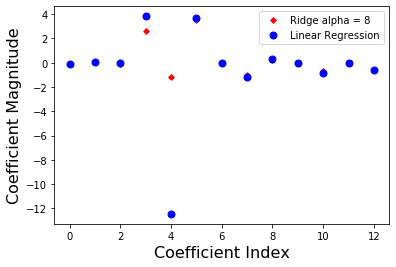

In [16]:
plt.plot(ridge_reg.coef_,linestyle = 'none',marker='D',markersize = 4,color = 'red',label = 'Ridge alpha = 8')
plt.plot(lin_reg.coef_,linestyle = 'none',marker = 'o',markersize = 7,color = 'blue',label = 'Linear Regression')
plt.xlabel("Coefficient Index",fontsize = 16)
plt.ylabel("Coefficient Magnitude",fontsize = 16)
plt.legend()
plt.show()

## Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([5.41402213])

In [18]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
#print(cancer.DESCR) # This is used for description.
#cancer = pd.read_csv(cancer.filename)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [19]:
cancer_df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
# here we are loading the x and y values
x = cancer.data
y = cancer.target

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 7)

In [22]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test,y_test)
print(train_score,test_score)

0.5770113191885182 0.5681160523550884


In [24]:
import numpy as np
coeff_used = np.sum(lasso.coef_!=0)
coeff_used
print(cancer_df.columns[lasso.coef_!=0])

Index(['area error', 'worst perimeter', 'worst area'], dtype='object')


In [25]:
print("training score",train_score)
print("test score",test_score)
print("Number of features used: ",coeff_used)

training score 0.5770113191885182
test score 0.5681160523550884
Number of features used:  3


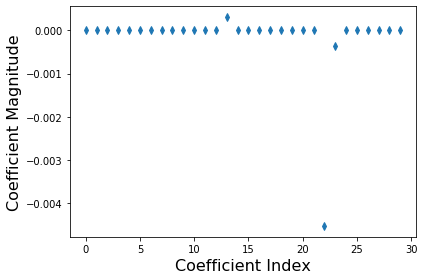

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("Coefficient Index",fontsize = 16)
plt.ylabel("Coefficient Magnitude",fontsize = 16)
#plt.subplot(122)
plt.plot(lasso.coef_,linestyle = 'none',marker = 'd',markersize = 5)
plt.tight_layout()
plt.show()

In [27]:
cancer_df.columns[10:25]

Index(['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness'],
      dtype='object')

## Elastic Net Regression

- As there are 30 features, initially but on application of Lasso regression , only 3 features are used, rest are all shrunk to zero (see th red stars in above plot) Try for different alpha to get best test score if you get less test and train scores as the data falls under underfitting.

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([5.30438929])

   In general ElasticNet is preferred over Lasoo since Lasso may behave erratically when the number of features are greater
    than the number of training instances.